In [ ]:
#importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [ ]:
#loading the dataset

In [4]:
dataset=pd.read_csv('./minute_weather.csv')

In [5]:
dataset.head(10)

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
6,6,2011-09-10 00:06:49,912.3,62.78,79.0,2.4,89.0,2.7,62.0,2.0,0.0,0.0,65.6
7,7,2011-09-10 00:07:49,912.3,62.42,86.0,2.0,92.0,2.4,75.0,1.8,0.0,0.0,65.2
8,8,2011-09-10 00:08:49,912.3,62.24,105.0,1.4,125.0,1.9,82.0,1.0,0.0,0.0,65.8
9,9,2011-09-10 00:09:49,912.3,62.24,93.0,0.4,126.0,0.7,14.0,0.2,0.0,0.0,58.6


In [7]:
dataset.shape

(1587257, 13)

In [8]:
dataset.dtypes

rowID                   int64
hpwren_timestamp       object
air_pressure          float64
air_temp              float64
avg_wind_direction    float64
avg_wind_speed        float64
max_wind_direction    float64
max_wind_speed        float64
min_wind_direction    float64
min_wind_speed        float64
rain_accumulation     float64
rain_duration         float64
relative_humidity     float64
dtype: object

In [9]:
dataset.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587257e+06,1.587257e+06,1.587257e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.586824e+06,1.587256e+06,1.587256e+06,1.587257e+06
mean,7.936280e+05,9.168301e+02,6.185144e+01,1.619654e+02,2.774272e+00,1.634030e+02,3.399813e+00,1.668264e+02,2.133130e+00,1.854836e-03,5.361460e-01,4.760837e+01
std,4.582018e+05,3.051593e+00,1.183362e+01,9.520812e+01,2.060758e+00,9.236723e+01,2.423167e+00,9.746275e+01,1.745345e+00,9.609716e-01,8.114766e+01,2.621454e+01
min,0.000000e+00,9.050000e+02,3.164000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01
25%,3.968140e+05,9.148000e+02,5.270000e+01,6.200000e+01,1.300000e+00,6.800000e+01,1.600000e+00,7.700000e+01,8.000000e-01,0.000000e+00,0.000000e+00,2.470000e+01
50%,7.936280e+05,9.167000e+02,6.224000e+01,1.820000e+02,2.200000e+00,1.870000e+02,2.700000e+00,1.800000e+02,1.600000e+00,0.000000e+00,0.000000e+00,4.470000e+01
75%,1.190442e+06,9.187000e+02,7.088000e+01,2.170000e+02,3.800000e+00,2.230000e+02,4.600000e+00,2.120000e+02,3.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01
max,1.587256e+06,9.295000e+02,9.950000e+01,3.590000e+02,3.230000e+01,3.590000e+02,3.600000e+01,3.590000e+02,3.200000e+01,6.550100e+02,6.330500e+04,9.300000e+01


In [ ]:
#checking for the null values

In [10]:
dataset.isnull().sum()

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().sum()

rowID                 0
hpwren_timestamp      0
air_pressure          0
air_temp              0
avg_wind_direction    0
avg_wind_speed        0
max_wind_direction    0
max_wind_speed        0
min_wind_direction    0
min_wind_speed        0
rain_accumulation     0
rain_duration         0
relative_humidity     0
dtype: int64

In [ ]:
#checking for the duplicated values

In [15]:
dataset.duplicated().sum()

0

In [17]:
dataset.shape

(1586823, 13)

In [20]:
dataset.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [ ]:
#dropping the unwanted columns

In [23]:
dataset.drop(columns=['rowID', 'hpwren_timestamp'],inplace=True)

In [24]:
dataset.head(5)

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6


In [25]:
x=dataset[['air_pressure', 'air_temp','avg_wind_direction', 'avg_wind_speed', 'max_wind_direction','max_wind_speed', 'min_wind_direction', 'min_wind_speed', 'rain_accumulation', 'rain_duration', 'relative_humidity']]

In [26]:
x

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6
...,...,...,...,...,...,...,...,...,...,...,...
1587252,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3
1587253,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2
1587254,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3
1587255,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2


In [ ]:
# to find the k value using elbow method

In [27]:
wcss_list= [] 

In [28]:
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x) 
    wcss_list.append(kmeans.inertia_) 

C:\Users\rahid\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rahid\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


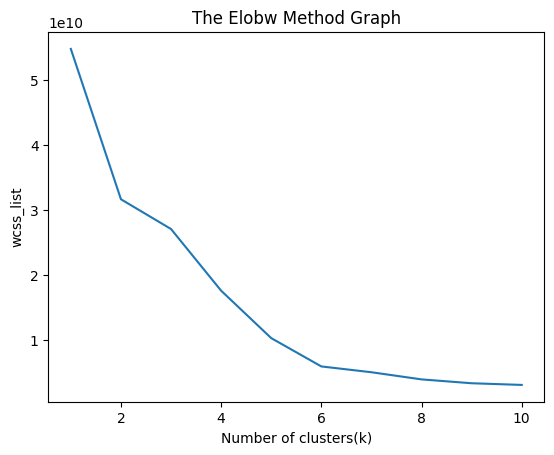

In [30]:
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [ ]:
#From the elbow graph ,we will take k=6

In [31]:
kmeans = KMeans(n_clusters=6) 
y_predict= kmeans.fit_predict(x) 

In [32]:
dataset['y_predict']=y_predict
dataset

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,y_predict
1,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9,1
2,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0,3
3,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5,0
4,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8,1
5,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1587252,915.9,74.66,1.0,1.8,11.0,2.1,357.0,1.6,0.0,0.0,46.3,3
1587253,915.9,74.66,9.0,1.6,19.0,1.8,353.0,1.4,0.0,0.0,46.2,3
1587254,915.9,74.66,15.0,1.7,42.0,2.3,353.0,1.2,0.0,0.0,46.3,3
1587255,915.9,74.66,8.0,1.8,24.0,2.2,355.0,1.4,0.0,0.0,46.2,3


In [36]:
dataset.sample(5)


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity,y_predict
7238,914.5,66.20,28.0,1.0,39.0,1.3,20.0,0.8,0.0,0.0,58.0,0
791755,914.6,41.18,189.0,4.3,192.0,4.7,186.0,4.0,0.0,0.0,90.4,1
761240,917.4,44.60,219.0,5.2,236.0,6.8,202.0,4.2,0.0,0.0,45.0,1
1216161,920.6,62.06,52.0,6.8,98.0,9.7,23.0,3.6,0.0,0.0,8.2,0
1301259,915.7,57.74,72.0,1.1,82.0,1.2,62.0,0.8,0.0,0.0,32.3,0


In [ ]:
#checking the predictions

In [33]:
kmeans.predict([[915.9,74.66,12.0,1.9,21.0,2.2,357.0,1.5,0.0,0.0,46.3]])

C:\Users\rahid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [37]:
kmeans.predict([[917.4,44.60,219.0,5.2,236.0,6.8,202.0,4.2,0.0,0.0,45.0]])

C:\Users\rahid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

In [38]:
kmeans.predict([[914.5,66.20,28.0,1.0,39.0,1.3,20.0,0.8,0.0,0.0,58.0]])

C:\Users\rahid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])